# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
**Source**
- Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

- Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

**Important**: We mentioned in our data ethics lesson earlier that data can include offensive or inappropriate language at times. This is already becoming very apparent in the Boston Data, which includes a racial variable. 
Note that the Boston Housing data was constructed in the 1970’s, and is based on US census Data. On census.gov, you can read the following note:
> "Census statistics date back to 1790 and reflect the growth and change of the United States. Past census reports contain some terms that today's readers may consider obsolete and inappropriate. As part of our goal to be open and transparent with the public, we are improving access to all Census Bureau original publications and statistics, which serve as a guide to the nation's history."

With that note, it is important to absolutely handle with care, and it is strongly adviced to _not_ use the racial variable when creating a predictive model.


## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  b        333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [5]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
df['crim'].mean()

3.360341471471471

In [7]:
df['rm'].median()

6.202000000000001

In [8]:
df['indus'].quantile(.9)

19.58

In [9]:
df.index

RangeIndex(start=0, stop=333, step=1)

In [10]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [11]:
df.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [12]:
df.shape

(333, 15)

In [13]:
df['crim'].mean()

3.360341471471471

In [16]:
def big_als_mean (data):
    
    if data >= 3.36: # data.mean() olmadi yerine 3.36 yazdim (burada x= data.mean() degiskene atamayi dene)
        return True
    else:
        return False

In [17]:


df['crim_mean'] = df['crim'].map(big_als_mean)


In [18]:
df

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crim_mean
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,False
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5,False
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,False
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,False
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,False


In [19]:
criminal_mean = df['crim_mean'] # pandas serisi olsturduk

In [20]:
df['ptratio'].mean()

18.448048048047994

In [21]:
def mean_ptratio (data): # ögrenci ögretmen orani icin
    if data >= 18.45: # data.mean() olmadi yerine 3.36 yazdim
        return True
    else:
        return False

In [22]:
df['ptratio_mean'] = df['ptratio'].map(mean_ptratio)

In [23]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crim_mean,ptratio_mean
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False,False
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False,False
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False,True
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,False,True
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,False,False


In [24]:
df['crim_mean'].value_counts()

False    248
True      85
Name: crim_mean, dtype: int64

In [24]:
df['ptratio_mean'].value_counts()

True     190
False    143
Name: ptratio_mean, dtype: int64

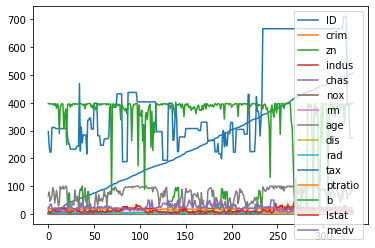

In [25]:
df.plot()

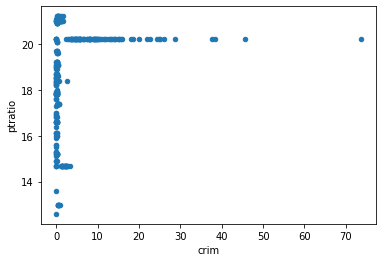

In [26]:
df.plot ('crim', 'ptratio', kind='scatter')

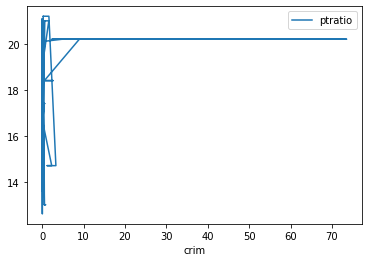

In [27]:
df.plot ('crim', 'ptratio'); # line default, scatter veya baska secenek secebilirsin

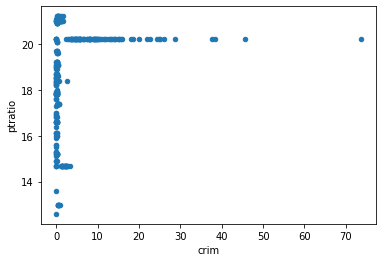

In [28]:
df.plot.scatter('crim', 'ptratio'); #Bu sekilde de yazilabilir

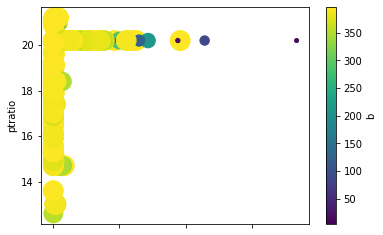

In [29]:
df.plot.scatter('crim', 'ptratio', 
                  c = 'b',
                  s = df['b'],
                  colormap = 'viridis'); # b afro-amerikan orani

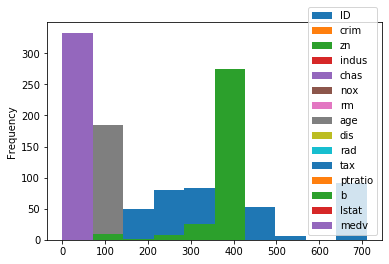

In [30]:
df.plot.hist(); 

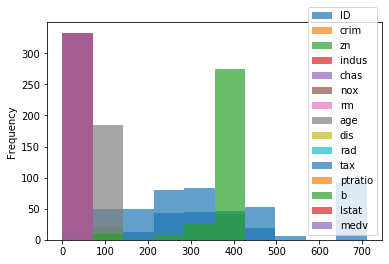

In [31]:
df.plot.hist(alpha = 0.7); 

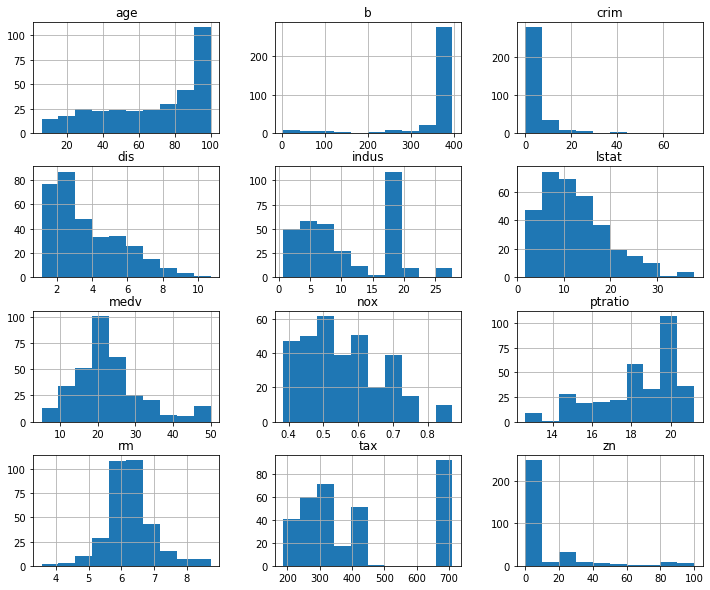

In [26]:
df.hist(column=['crim', 'age', 'nox', 'zn', 'indus', 'rm', 'tax', 'ptratio', 'dis', 'b','lstat', 'medv'], figsize=(12,10))
plt.show()

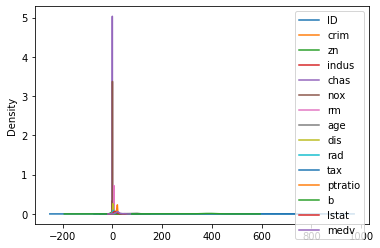

In [32]:
df.plot.kde();

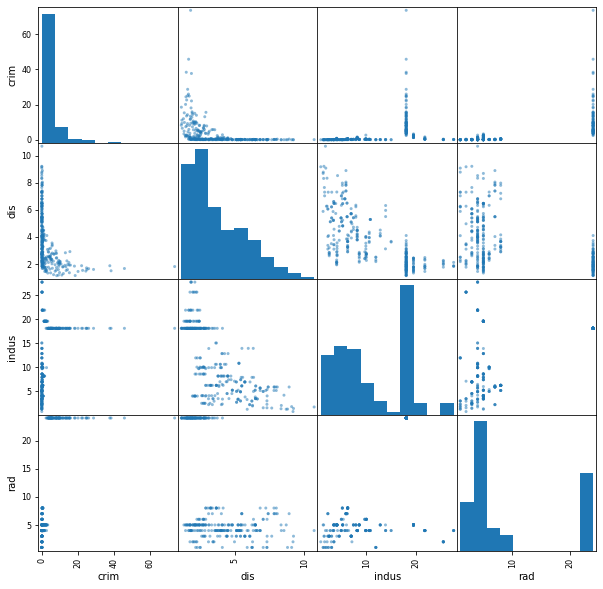

In [33]:
pd.plotting.scatter_matrix(df[['crim', 'dis', 'indus', 'rad']], figsize=(10,10));

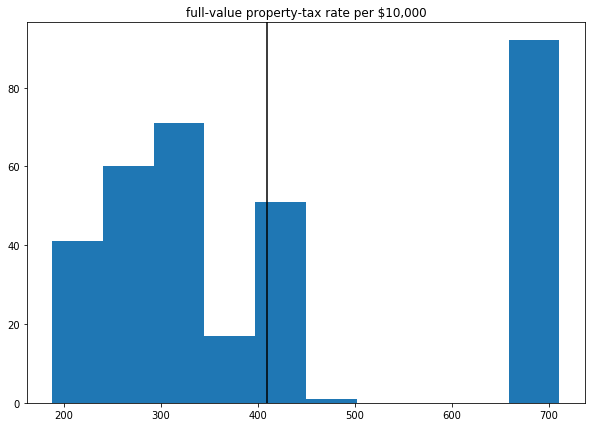

In [35]:
# Create a plot that shows the tax (full-value property-tax rate per $10,000) Distribution
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df['tax'], bins='auto')
ax.set_title('full-value property-tax rate per $10,000')
#ax.set_xlabel('???')
#ax.set_ylabel('???')
ax.axvline(df['tax'].mean(), color='black');

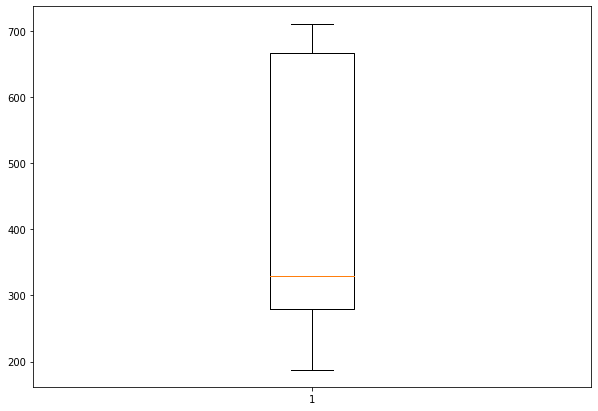

In [37]:
# Create a Box Plot for tax
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(df['tax']);
#ax.set_ylabel('House Price ($)');